<a href="https://colab.research.google.com/github/mimz-skywalker/WaterPupms/blob/main/WaterPupms_FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зареждам данните от двата файла:

In [ ]:
import pandas as pd
 
 
train_dataset = pd.read_csv("https://raw.githubusercontent.com/mimz-skywalker/WaterPupms/main/train_pumps.csv")
test_dataset = pd.read_csv("https://raw.githubusercontent.com/mimz-skywalker/WaterPupms/main/test_pumps.csv")
 
print(train_dataset.shape)
print(test_dataset.shape)

(6716, 39)
(2500, 38)


Принтирам в табличен първите четири записа вид:

In [ ]:
train_dataset.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,71382,0.0,Twesa,0,TWESA,32.880835,-3.592052e+00,Lyagiti Shuleni,0,Lake Victoria,Mwabaluhi,Shinyanga,17,3,Shinyanga Rural,Lyabukande,0,False,Parastatal,NaN,True,0,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,functional needs repair
1,67471,20.0,Government Of Tanzania,971,DWE,36.824159,-3.500453e+00,Kwa Tomasi Emanuel,0,Pangani,Marurani Kati,Arusha,2,2,Arusha Rural,Nduruma,150,True,VWC,Machumba estate pipe line,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
2,22778,200.0,Mwaya Mn,262,Communit,36.906584,-7.835830e+00,Kwamakingi,0,Rufiji,Mlagayai,Morogoro,5,3,Kilombero,Mang'ula,200,True,WUA,Mangula,True,2009,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
3,26356,500.0,Unicef/central,1737,DWE,34.697489,-9.110604e+00,Shuleni,0,Rufiji,Ngelele,Iringa,11,4,Njombe,Mdandu,350,True,WUA,wanging'ombe water supply s,True,1974,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,others
4,70935,0.0,Dwsp,0,DWE,0.000000,-2.000000e-08,Izinga,0,Lake Victoria,Mwakapalala,Shinyanga,17,1,Bariadi,Nkoma,0,True,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,pay when scheme fails,on failure,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional needs repair


Конкатенирам двата масива:

In [ ]:
dataset = pd.concat([train_dataset, test_dataset])

Премахвам колоните, които нямат отношение към модела и не носят информация:

In [ ]:
train_dataset = train_dataset.drop(columns=['id'])
test_dataset = test_dataset.drop(columns=['id'])

train_dataset.head()


,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0.0,Twesa,0,TWESA,32.880835,-3.592052e+00,Lyagiti Shuleni,0,Lake Victoria,Mwabaluhi,Shinyanga,17,3,Shinyanga Rural,Lyabukande,0,False,Parastatal,NaN,True,0,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,functional needs repair
1,20.0,Government Of Tanzania,971,DWE,36.824159,-3.500453e+00,Kwa Tomasi Emanuel,0,Pangani,Marurani Kati,Arusha,2,2,Arusha Rural,Nduruma,150,True,VWC,Machumba estate pipe line,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
2,200.0,Mwaya Mn,262,Communit,36.906584,-7.835830e+00,Kwamakingi,0,Rufiji,Mlagayai,Morogoro,5,3,Kilombero,Mang'ula,200,True,WUA,Mangula,True,2009,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
3,500.0,Unicef/central,1737,DWE,34.697489,-9.110604e+00,Shuleni,0,Rufiji,Ngelele,Iringa,11,4,Njombe,Mdandu,350,True,WUA,wanging'ombe water supply s,True,1974,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,others
4,0.0,Dwsp,0,DWE,0.000000,-2.000000e-08,Izinga,0,Lake Victoria,Mwakapalala,Shinyanga,17,1,Bariadi,Nkoma,0,True,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,pay when scheme fails,on failure,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional needs repair


In [ ]:
test_dataset.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,20,Idara Ya Maji,1286,Idara ya maji,34.835584,-5.741805e+00,Line Polisi,0,Internal,Sayuni,Singida,13,3,Manyoni,Manyoni,85,False,VWC,Manyoni water supply,False,2002,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
1,0,Dwsp,0,DWE,0.000000,-2.000000e-08,Muungano,0,Lake Victoria,Galuwa,Shinyanga,17,1,Bariadi,Nyakabindi,0,True,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,0,Government Of Tanzania,0,DWE,0.000000,-2.000000e-08,Butundwe Secondary,0,Lake Victoria,Ccm,Mwanza,19,6,Geita,Nyakagomba,0,True,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
3,0,Hesawa,0,DWE,31.066585,-3.152475e+00,Kwa Makele,0,Lake Tanganyika,Luchindu,Kagera,18,4,Biharamulo,Kalenge,0,True,VWC,Kalenge Water Supply,True,0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,0,Danida,997,DWE,35.556327,-1.080788e+01,Kwa Lomwady,0,Ruvuma / Southern Coast,Nakahimba,Ruvuma,10,2,Songea Rural,Mpitimbi,0,True,VWC,Mradi wa maji wa mpitimbi,True,1978,gravity,gravity,gravity,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe


Тест дали са премахнати колоните:

In [ ]:
print(train_dataset.shape)
print(test_dataset.shape)

(6716, 38)
(2500, 37)


In [ ]:
dataset = pd.concat([train_dataset, test_dataset])

Конвертирам полетата, които носят информация за типа на данните и не са цифрови полета:

In [ ]:
text_columns = ['funder', 'installer', 'basin', 'subvillage', 'lga', 'region_code', 'payment', 'payment_type'
          , 'ward', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'waterpoint_type'
          , 'extraction_type_group', 'extraction_type_class', 'management', 'management_group'
          , 'water_quality', 'quality_group', 'quantity', 'source', 'quantity_group', 'source_type', 'source_class'
          , 'waterpoint_type_group', 'region', 'scheme_name', 'wpt_name', 'status_group'] 
for column in text_columns:
  dataset[column] = dataset[column].astype('category').cat.codes.values
 
dataset

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0.0,615,0,647,32.880835,-3.592052e+00,4730,0,4,3887,17,16,3,103,773,0,0,2,-1,1,0,9,6,3,3,2,0,2,6,2,3,3,5,3,1,5,4,0
1,20.0,175,971,156,36.824159,-3.500453e+00,4135,0,5,2890,0,1,2,0,1316,150,1,6,586,1,2009,3,1,0,7,4,4,5,6,2,2,2,8,6,0,1,1,0
2,200.0,388,262,116,36.906584,-7.835830e+00,4413,0,6,3446,11,4,3,35,878,200,1,7,655,1,2009,3,1,0,7,4,3,1,6,2,2,2,6,4,1,1,1,0
3,500.0,629,1737,156,34.697489,-9.110604e+00,6427,0,6,4403,3,10,4,91,988,350,1,7,1311,1,1974,3,1,0,10,4,3,1,6,2,1,1,6,4,1,1,1,1
4,0.0,137,0,156,0.000000,-2.000000e-08,740,0,4,3944,17,16,1,5,1371,0,1,8,-1,0,0,14,11,1,11,4,5,3,6,2,2,2,7,5,0,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,666,0,115,35.624135,-6.041987e+00,2783,0,0,43,2,0,5,14,949,0,1,6,-1,0,0,9,6,3,7,4,0,2,6,2,0,0,7,5,0,5,4,-1
2496,0.0,428,1625,472,29.798026,-4.434219e+00,6103,0,3,4821,5,15,2,28,1169,650,1,10,-1,0,1995,9,6,3,7,4,0,2,6,2,1,1,8,6,0,4,3,-1
2497,0.0,175,0,156,35.834062,-6.241920e+00,6355,0,8,2476,2,0,5,14,1330,0,1,6,959,0,0,7,4,2,7,4,0,2,6,2,0,0,3,0,0,2,1,-1
2498,0.0,104,0,136,33.280202,-9.006429e+00,6476,0,2,2672,10,11,2,60,31,0,1,6,-1,0,0,3,1,0,11,4,5,3,6,2,1,1,6,4,1,1,1,-1


Същата операция за status_group:

In [ ]:
dataset['status_group'] = dataset['status_group'].astype('category').cat.codes.values
dataset

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0.0,615,0,647,32.880835,-3.592052e+00,4730,0,4,3887,17,16,3,103,773,0,0,2,-1,1,0,9,6,3,3,2,0,2,6,2,3,3,5,3,1,5,4,1
1,20.0,175,971,156,36.824159,-3.500453e+00,4135,0,5,2890,0,1,2,0,1316,150,1,6,586,1,2009,3,1,0,7,4,4,5,6,2,2,2,8,6,0,1,1,1
2,200.0,388,262,116,36.906584,-7.835830e+00,4413,0,6,3446,11,4,3,35,878,200,1,7,655,1,2009,3,1,0,7,4,3,1,6,2,2,2,6,4,1,1,1,1
3,500.0,629,1737,156,34.697489,-9.110604e+00,6427,0,6,4403,3,10,4,91,988,350,1,7,1311,1,1974,3,1,0,10,4,3,1,6,2,1,1,6,4,1,1,1,2
4,0.0,137,0,156,0.000000,-2.000000e-08,740,0,4,3944,17,16,1,5,1371,0,1,8,-1,0,0,14,11,1,11,4,5,3,6,2,2,2,7,5,0,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,666,0,115,35.624135,-6.041987e+00,2783,0,0,43,2,0,5,14,949,0,1,6,-1,0,0,9,6,3,7,4,0,2,6,2,0,0,7,5,0,5,4,0
2496,0.0,428,1625,472,29.798026,-4.434219e+00,6103,0,3,4821,5,15,2,28,1169,650,1,10,-1,0,1995,9,6,3,7,4,0,2,6,2,1,1,8,6,0,4,3,0
2497,0.0,175,0,156,35.834062,-6.241920e+00,6355,0,8,2476,2,0,5,14,1330,0,1,6,959,0,0,7,4,2,7,4,0,2,6,2,0,0,3,0,0,2,1,0
2498,0.0,104,0,136,33.280202,-9.006429e+00,6476,0,2,2672,10,11,2,60,31,0,1,6,-1,0,0,3,1,0,11,4,5,3,6,2,1,1,6,4,1,1,1,0


Обработка на num values (цифрови полета от dataset - a), нормализиране на данните:

In [ ]:
num_values = dataset.dtypes[dataset.dtypes != 'object'].index
num_values

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [ ]:
dataset[num_values]

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,0.0,615,0,647,32.880835,-3.592052e+00,4730,0,4,3887,17,16,3,103,773,0,0,2,-1,1,0,9,6,3,3,2,0,2,6,2,3,3,5,3,1,5,4,1
1,20.0,175,971,156,36.824159,-3.500453e+00,4135,0,5,2890,0,1,2,0,1316,150,1,6,586,1,2009,3,1,0,7,4,4,5,6,2,2,2,8,6,0,1,1,1
2,200.0,388,262,116,36.906584,-7.835830e+00,4413,0,6,3446,11,4,3,35,878,200,1,7,655,1,2009,3,1,0,7,4,3,1,6,2,2,2,6,4,1,1,1,1
3,500.0,629,1737,156,34.697489,-9.110604e+00,6427,0,6,4403,3,10,4,91,988,350,1,7,1311,1,1974,3,1,0,10,4,3,1,6,2,1,1,6,4,1,1,1,2
4,0.0,137,0,156,0.000000,-2.000000e-08,740,0,4,3944,17,16,1,5,1371,0,1,8,-1,0,0,14,11,1,11,4,5,3,6,2,2,2,7,5,0,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,666,0,115,35.624135,-6.041987e+00,2783,0,0,43,2,0,5,14,949,0,1,6,-1,0,0,9,6,3,7,4,0,2,6,2,0,0,7,5,0,5,4,0
2496,0.0,428,1625,472,29.798026,-4.434219e+00,6103,0,3,4821,5,15,2,28,1169,650,1,10,-1,0,1995,9,6,3,7,4,0,2,6,2,1,1,8,6,0,4,3,0
2497,0.0,175,0,156,35.834062,-6.241920e+00,6355,0,8,2476,2,0,5,14,1330,0,1,6,959,0,0,7,4,2,7,4,0,2,6,2,0,0,3,0,0,2,1,0
2498,0.0,104,0,136,33.280202,-9.006429e+00,6476,0,2,2672,10,11,2,60,31,0,1,6,-1,0,0,3,1,0,11,4,5,3,6,2,1,1,6,4,1,1,1,0


Стандартизирам всички числови стойности:

In [ ]:
dataset[num_values] = dataset[num_values].apply(
    lambda x: (x - x.mean()) / (x.std()))
dataset[num_values]

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,-0.116688,1.514433,-0.981129,1.886416,-0.010069,0.638382,0.426673,-0.047192,0.002207,0.665386,1.261688,0.735210,-0.251960,1.327999,-0.211069,-0.40680,-1.608861,-1.587142,-0.811159,0.693081,-1.319412,0.844331,0.719541,1.254085,-2.131415,-1.748439,-1.015061,-0.398222,0.257201,-0.29077,2.082468,2.082468,-0.628915,-0.528304,1.531535,2.280315,2.671582,-0.122837
1,-0.109264,-0.545106,0.457793,-0.499686,0.462839,0.668730,0.150490,-0.047192,0.417358,0.048086,-1.683529,-1.532275,-0.361033,-1.629615,0.885136,-0.06756,0.378974,0.007788,0.568939,0.693081,0.771126,-0.736549,-0.748013,-0.681221,-0.196704,0.321256,0.781176,1.267694,0.257201,-0.29077,0.770910,0.770910,0.970003,0.934105,-0.632953,-0.830771,-0.628565,-0.122837
2,-0.042445,0.451898,-0.592872,-0.694073,0.472724,-0.767640,0.279530,-0.047192,0.832509,0.392338,0.222200,-1.078778,-0.251960,-0.624601,0.000904,0.04552,0.378974,0.406520,0.731165,0.693081,0.771126,-0.736549,-0.748013,-0.681221,-0.196704,0.321256,0.332117,-0.953527,0.257201,-0.29077,0.770910,0.770910,-0.095942,-0.040834,1.531535,-0.830771,-0.628565,-0.122837
3,0.068920,1.579964,1.592926,-0.499686,0.207796,-1.189991,1.214377,-0.047192,0.832509,0.984871,-1.163785,-0.171784,-0.142886,0.983422,0.222972,0.38476,0.378974,0.406520,2.273488,0.693081,0.734706,-0.736549,-0.748013,-0.681221,1.254329,0.321256,0.332117,-0.953527,0.257201,-0.29077,-0.540648,-0.540648,-0.095942,-0.040834,1.531535,-0.830771,-0.628565,1.136410
4,-0.116688,-0.722975,-0.981129,-0.499686,-3.953349,1.828478,-1.425382,-0.047192,0.002207,0.700678,1.261688,0.735210,-0.470106,-1.486042,0.996170,-0.40680,0.378974,0.805253,-0.811159,-0.985613,-1.319412,2.161731,2.187095,-0.036119,1.738007,0.321256,1.230236,0.157083,0.257201,-0.29077,0.770910,0.770910,0.437031,0.446636,-0.632953,2.280315,2.671582,-0.122837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.116688,1.753152,-0.981129,-0.698932,0.318925,-0.173315,-0.477074,-0.047192,-1.658396,-1.714653,-1.337033,-1.683440,-0.033813,-1.227609,0.144239,-0.40680,0.378974,0.007788,-0.811159,-0.985613,-1.319412,0.844331,0.719541,1.254085,-0.196704,0.321256,-1.015061,-0.398222,0.257201,-0.29077,-1.852206,-1.852206,0.437031,0.446636,-0.632953,2.280315,2.671582,-1.382083
2496,-0.116688,0.639129,1.426954,1.035972,-0.379779,0.359360,1.063985,-0.047192,-0.412943,1.243678,-0.817289,0.584045,-0.361033,-0.825604,0.588373,1.06324,0.378974,1.602718,-0.811159,-0.985613,0.756558,0.844331,0.719541,1.254085,-0.196704,0.321256,-1.015061,-0.398222,0.257201,-0.29077,-0.540648,-0.540648,0.970003,0.934105,-0.632953,1.502544,1.571533,-1.382083
2497,-0.116688,-0.545106,-0.981129,-0.499686,0.344101,-0.239556,1.180957,-0.047192,1.662810,-0.208244,-1.337033,-1.683440,-0.033813,-1.227609,0.913399,-0.40680,0.378974,0.007788,1.445900,-0.985613,-1.319412,0.317371,0.132519,0.608983,-0.196704,0.321256,-1.015061,-0.398222,0.257201,-0.29077,-1.852206,-1.852206,-1.694860,-1.990712,-0.632953,-0.052999,-0.628565,-1.382083
2498,-0.116688,-0.877441,-0.981129,-0.596879,0.037825,-1.155476,1.237122,-0.047192,-0.828094,-0.086890,0.048952,-0.020618,-0.361033,0.093267,-1.709014,-0.40680,0.378974,0.007788,-0.811159,-0.985613,-1.319412,-0.736549,-0.748013,-0.681221,1.738007,0.321256,1.230236,0.157083,0.257201,-0.29077,-0.540648,-0.540648,-0.095942,-0.040834,1.531535,-0.830771,-0.628565,-1.382083


Присвоявам 0 на полетата, в които липсва стойност:

In [ ]:
dataset[num_values] = dataset[num_values].fillna(0)
dataset

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,-0.116688,1.514433,-0.981129,1.886416,-0.010069,0.638382,0.426673,-0.047192,0.002207,0.665386,1.261688,0.735210,-0.251960,1.327999,-0.211069,-0.40680,-1.608861,-1.587142,-0.811159,0.693081,-1.319412,0.844331,0.719541,1.254085,-2.131415,-1.748439,-1.015061,-0.398222,0.257201,-0.29077,2.082468,2.082468,-0.628915,-0.528304,1.531535,2.280315,2.671582,-0.122837
1,-0.109264,-0.545106,0.457793,-0.499686,0.462839,0.668730,0.150490,-0.047192,0.417358,0.048086,-1.683529,-1.532275,-0.361033,-1.629615,0.885136,-0.06756,0.378974,0.007788,0.568939,0.693081,0.771126,-0.736549,-0.748013,-0.681221,-0.196704,0.321256,0.781176,1.267694,0.257201,-0.29077,0.770910,0.770910,0.970003,0.934105,-0.632953,-0.830771,-0.628565,-0.122837
2,-0.042445,0.451898,-0.592872,-0.694073,0.472724,-0.767640,0.279530,-0.047192,0.832509,0.392338,0.222200,-1.078778,-0.251960,-0.624601,0.000904,0.04552,0.378974,0.406520,0.731165,0.693081,0.771126,-0.736549,-0.748013,-0.681221,-0.196704,0.321256,0.332117,-0.953527,0.257201,-0.29077,0.770910,0.770910,-0.095942,-0.040834,1.531535,-0.830771,-0.628565,-0.122837
3,0.068920,1.579964,1.592926,-0.499686,0.207796,-1.189991,1.214377,-0.047192,0.832509,0.984871,-1.163785,-0.171784,-0.142886,0.983422,0.222972,0.38476,0.378974,0.406520,2.273488,0.693081,0.734706,-0.736549,-0.748013,-0.681221,1.254329,0.321256,0.332117,-0.953527,0.257201,-0.29077,-0.540648,-0.540648,-0.095942,-0.040834,1.531535,-0.830771,-0.628565,1.136410
4,-0.116688,-0.722975,-0.981129,-0.499686,-3.953349,1.828478,-1.425382,-0.047192,0.002207,0.700678,1.261688,0.735210,-0.470106,-1.486042,0.996170,-0.40680,0.378974,0.805253,-0.811159,-0.985613,-1.319412,2.161731,2.187095,-0.036119,1.738007,0.321256,1.230236,0.157083,0.257201,-0.29077,0.770910,0.770910,0.437031,0.446636,-0.632953,2.280315,2.671582,-0.122837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.116688,1.753152,-0.981129,-0.698932,0.318925,-0.173315,-0.477074,-0.047192,-1.658396,-1.714653,-1.337033,-1.683440,-0.033813,-1.227609,0.144239,-0.40680,0.378974,0.007788,-0.811159,-0.985613,-1.319412,0.844331,0.719541,1.254085,-0.196704,0.321256,-1.015061,-0.398222,0.257201,-0.29077,-1.852206,-1.852206,0.437031,0.446636,-0.632953,2.280315,2.671582,-1.382083
2496,-0.116688,0.639129,1.426954,1.035972,-0.379779,0.359360,1.063985,-0.047192,-0.412943,1.243678,-0.817289,0.584045,-0.361033,-0.825604,0.588373,1.06324,0.378974,1.602718,-0.811159,-0.985613,0.756558,0.844331,0.719541,1.254085,-0.196704,0.321256,-1.015061,-0.398222,0.257201,-0.29077,-0.540648,-0.540648,0.970003,0.934105,-0.632953,1.502544,1.571533,-1.382083
2497,-0.116688,-0.545106,-0.981129,-0.499686,0.344101,-0.239556,1.180957,-0.047192,1.662810,-0.208244,-1.337033,-1.683440,-0.033813,-1.227609,0.913399,-0.40680,0.378974,0.007788,1.445900,-0.985613,-1.319412,0.317371,0.132519,0.608983,-0.196704,0.321256,-1.015061,-0.398222,0.257201,-0.29077,-1.852206,-1.852206,-1.694860,-1.990712,-0.632953,-0.052999,-0.628565,-1.382083
2498,-0.116688,-0.877441,-0.981129,-0.596879,0.037825,-1.155476,1.237122,-0.047192,-0.828094,-0.086890,0.048952,-0.020618,-0.361033,0.093267,-1.709014,-0.40680,0.378974,0.007788,-0.811159,-0.985613,-1.319412,-0.736549,-0.748013,-0.681221,1.738007,0.321256,1.230236,0.157083,0.257201,-0.29077,-0.540648,-0.540648,-0.095942,-0.040834,1.531535,-0.830771,-0.628565,-1.382083


Масиви за обучение и тестване:

In [ ]:
 
import torch
 
num_train = train_dataset.shape[0]
train_features = torch.tensor(dataset[:num_train].values,
                              dtype=torch.float)
test_features = torch.tensor(dataset[num_train:].values,
                             dtype=torch.float)
train_labels = torch.tensor(train_dataset['status_group']=="functional needs repair", dtype=torch.float).view(-1,1)

Клас, дефиниращ невронната мрежа, както и обучаващата функция:

In [ ]:
import torch
from torch import nn 

class Net(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.fc1 = nn.Linear(in_features, 128)
    self.output = nn.Linear(128, out_features)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.output(x)
    return torch.sigmoid(x)

loss = nn.BCELoss()
in_features = train_features.shape[1]

def train(net, train_features, train_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
  train_ls = []
  train_tensor = torch.utils.data.TensorDataset(torch.Tensor(train_features), 
                                                torch.Tensor(train_labels))
  train_loader = torch.utils.data.DataLoader(train_tensor,
                                             batch_size=batch_size, shuffle=False)

  optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate,
                               weight_decay=weight_decay)

  for epoch in range(num_epochs):
    epoch_loss = 0
    for X, y in train_loader:
      optimizer.zero_grad()
      output = net(X)
      l = loss(output, y)
      l.backward()
      optimizer.step()
      epoch_loss += l.item() / len(train_loader)
    train_ls.append(epoch_loss)
    print('epoch {}, loss {}'.format(epoch, epoch_loss))
  return train_ls

net = Net(in_features, 1)


num_epochs = 70
learning_rate = 0.01
weight_decay = 0
batch_size = 64

Тест на мрежата:

In [ ]:
train_ls = train(net, 
                 train_features, 
                 train_labels,
                 num_epochs, 
                 learning_rate,
                 weight_decay, 
                 batch_size)

epoch 0, loss 0.12757646061280467
epoch 1, loss 0.010098979453600587
epoch 2, loss 0.016324927632272845
epoch 3, loss 0.008865465086403547
epoch 4, loss 3.453183993596689e-05
epoch 5, loss 2.0883662169321053e-05
epoch 6, loss 1.5533405682314576e-05
epoch 7, loss 1.2500848745167742e-05
epoch 8, loss 1.0511868307124436e-05
epoch 9, loss 9.093178667691455e-06
epoch 10, loss 8.023970747758756e-06
epoch 11, loss 7.185429655822064e-06
epoch 12, loss 6.506749704861987e-06
epoch 13, loss 5.944945355839166e-06
epoch 14, loss 5.471461448299429e-06
epoch 15, loss 5.0643774004908805e-06
epoch 16, loss 4.709927285754626e-06
epoch 17, loss 4.398108782360007e-06
epoch 18, loss 4.120741315697767e-06
epoch 19, loss 3.872215576111991e-06
epoch 20, loss 3.647665093489021e-06
epoch 21, loss 3.442890684233308e-06
epoch 22, loss 3.254609553204361e-06
epoch 23, loss 3.0815676143988855e-06
epoch 24, loss 2.921404062102998e-06
epoch 25, loss 2.7722950476128877e-06
epoch 26, loss 2.6337548872236633e-06
epoch 27

Графика на загубите:

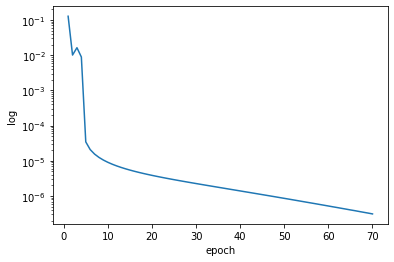

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
 
plt.plot(np.arange(1, num_epochs+1), train_ls)
plt.xlabel("epoch")
plt.ylabel("log")
plt.yscale("log")
plt.show()